# Notebook de Análise Exploratória de Dados (AED)

In [1]:
import pandas as pd
from collections import Counter
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
dtypes = {  'Regiao': 'object',
            'UF': 'object', 
            'CNAE': 'object',
            'Atendida':'bool',
            'CodAssunto': 'object',
            'SexoConsumidor': 'object',
            'FaixaEtaria': 'object',
            'CEP': 'object',
            'InscritoDAU':'bool'}

In [3]:
df_aed = pd.read_csv(r'C:\Users\73594253368\Desktop\Curso\Datasets\Procon\df_aed.csv',dtype=dtypes)

In [4]:
df_aed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10519 entries, 0 to 10518
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      10519 non-null  int64 
 1   Regiao          10519 non-null  object
 2   UF              10519 non-null  object
 3   CNAE            10519 non-null  object
 4   Atendida        10519 non-null  bool  
 5   CodAssunto      10519 non-null  object
 6   SexoConsumidor  10519 non-null  object
 7   FaixaEtaria     10519 non-null  object
 8   CEP             10519 non-null  object
 9   InscritoDAU     10519 non-null  bool  
dtypes: bool(2), int64(1), object(7)
memory usage: 678.1+ KB


In [5]:
# Retiraremos a coluna 'Unnamed: 0'
# Com isso, temos apenas variáveis categóricas
df_aed.drop(columns='Unnamed: 0',inplace=True)

# Parte I - Análise Univariada


# 1) Variável da Coluna "Região"

In [6]:
# Descrição dos valores da variável
print('Valores únicos',(df_aed['Regiao']).unique().shape)
unique_regiao = df_aed['Regiao'].unique()
print(unique_regiao)
cont_regiao = df_aed['Regiao'].value_counts()
print(cont_regiao)


Valores únicos (5,)
['Norte' 'Nordeste' 'Sudeste' 'Sul' 'Centro-oeste']
Sudeste         5627
Centro-oeste    1977
Norte           1240
Nordeste        1153
Sul              522
Name: Regiao, dtype: int64


D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

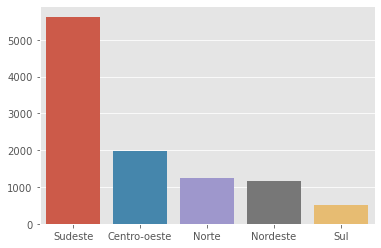

In [7]:
# Gráfico de Colunas

sns.barplot(cont_regiao.index, cont_regiao.values)

Verifica-se, portanto, maior número na Região Sudeste

# 2) Variável da Coluna "UF"

In [8]:
# Descrição dos valores da variável
# Informamos que a base original contém apenas 15 UF
print('Valores únicos',(df_aed['UF']).unique().shape)
unique_uf = df_aed['UF'].unique()
print(unique_uf)
cont_uf = df_aed['UF'].value_counts()
print(cont_uf)

Valores únicos (15,)
['RO' 'RN' 'MG' 'CE' 'ES' 'SP' 'RJ' 'PR' 'SC' 'MT' 'GO' 'PB' 'RS' 'MS'
 'PA']
SP    2865
GO    1337
RJ    1336
RO    1208
MG    1086
RN     994
MT     561
SC     452
ES     340
PB      90
MS      79
CE      69
PR      38
RS      32
PA      32
Name: UF, dtype: int64


D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

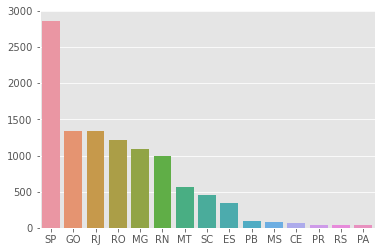

In [9]:
# Gráfico de Colunas
cont_uf = cont_uf[:27] # Informamos que a base original contém apenas 15 UF, não apresenta todas as 27
sns.barplot(cont_uf.index, cont_uf.values)

Em linha com o resultado da coluna "Região", São Paulo é a UF com mais demandas

<AxesSubplot:>

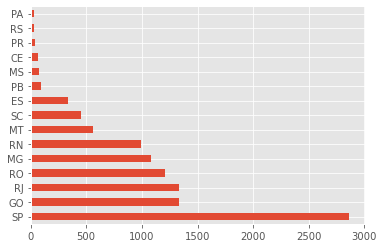

In [10]:
# Gráfico de Barras para outra visualização
df_aed['UF'].value_counts().plot.barh()

# 3) Variável da Coluna "CNAE"
   Uma variável explicativa de cardinalidade muito elevada

In [11]:
# 2 CNAE - uma variável explicativa de cardinalidade muito elevada
print('Valores únicos',(df_aed['CNAE']).unique().shape)
unique_cnae = df_aed['CNAE'].unique()
# print(unique_cnae) #optamos por não printar 
cont_cnae = df_aed['CNAE'].value_counts()
print(cont_cnae)

Valores únicos (368,)
6422100.0    992
3514000.0    664
6120501.0    663
6110801.0    572
4753900.0    529
            ... 
5320202.0      1
4543900.0      1
9529105.0      1
1721400.0      1
6410700.0      1
Name: CNAE, Length: 368, dtype: int64


As partes mais altas do histograma correspondem aos que tiveram maiores ocorrências:
- 6422100 BANCO MÚLTIPLO COM CARTEIRA COMERCIAL - 992
- 3514000 ENERGIA ELÉTRICA; OPERAÇÃO DE SISTEMAS DE DISTRIBUIÇÃO DE0 - 664
- 6120501 SERVIÇO MÓVEL DE CELULAR -    663
- 6110801 COMUNICAÇÃO TELEFÔNICA CONVENCIONAL -  572
- 4753900 ELETRODOMÉSTICOS; COMÉRCIO VAREJISTA  - 529

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

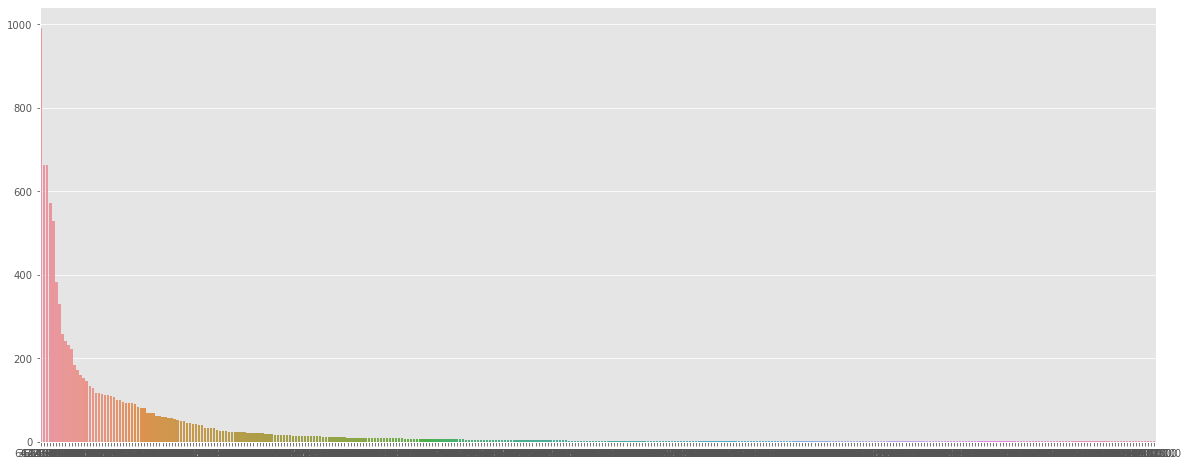

In [12]:
# Gráfico de Colunas do CNAE 
# cont_cnae = cont_cnae[:10]  #Não executou quando colocamos as dez primeiras, p exemplo

plt.figure(figsize= [20,8])
sns.barplot(cont_cnae.index, cont_cnae.values)


In [13]:
# Como vimos acima, a variável de elevada cardinalidade teve problemas. Colocaremos em percentual e restringiremos 
# aos dez maiores para melhorar a visualização

In [14]:
pc_cnae = (df_aed['CNAE'].value_counts(normalize = True) * 100).to_frame('Porcentagem').reset_index()
pc_cnae.rename(columns = {'index': 'CNAE'}, inplace = True) 
pc_cnae

,CNAE,Porcentagem
0,6422100.0,9.430554
1,3514000.0,6.312387
2,6120501.0,6.302881
3,6110801.0,5.437779
4,4753900.0,5.028995
...,...,...
363,5320202.0,0.009507
364,4543900.0,0.009507
365,9529105.0,0.009507
366,1721400.0,0.009507


In [15]:
#Apenas os dez maiores valores
pc_cnae_dez = pc_cnae[:10]

<AxesSubplot:xlabel='CNAE', ylabel='Porcentagem'>

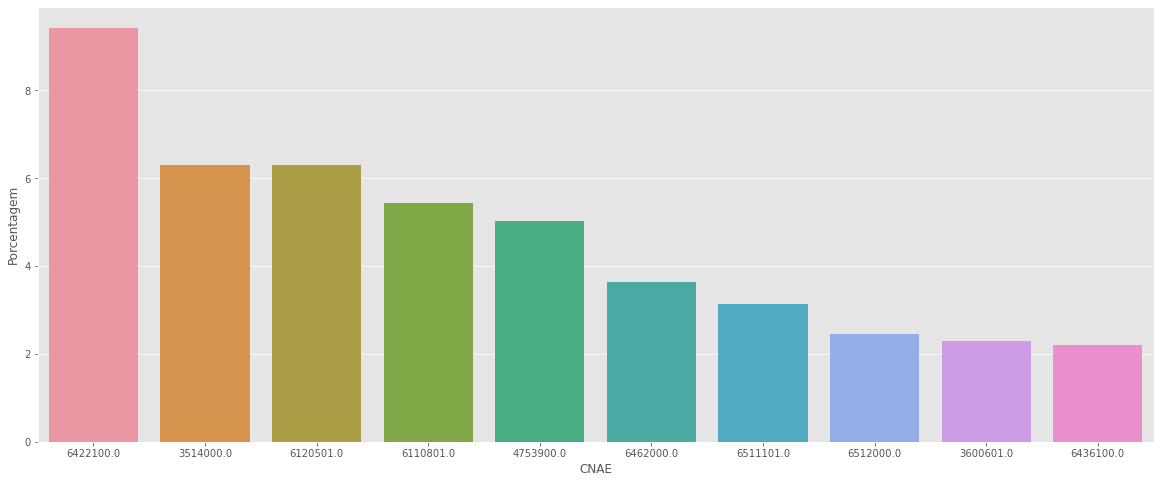

In [16]:
#Gráfico de colunas com apenas os dez maiores
plt.figure(figsize= [20,8])
sns.barplot(x='CNAE',y='Porcentagem',data=pc_cnae_dez)

- 6422100 BANCO MÚLTIPLO COM CARTEIRA COMERCIAL - 9.43%
- 3514000 ENERGIA ELÉTRICA; OPERAÇÃO DE SISTEMAS DE DISTRIBUIÇÃO - 6.31%
- 6120501 SERVIÇO MÓVEL DE CELULAR - 6.30%
- 6110801 COMUNICAÇÃO TELEFÔNICA CONVENCIONAL - 5.43%
- 4753900 ELETRODOMÉSTICOS; COMÉRCIO VAREJISTA - 5.02%
- 6462000 EMPRESA NÃO-FINANCEIRA CONTROLADORA - 3.64%
- 6511101 SEGURO DE VIDA - 3.13%
- 6512000 ADMINISTRADORA DE SEGUROS NÃO VIDA - 2.45%
- 3600601 ABASTECIMENTO DE ÁGUA; SERVIÇO DE - 2.30%
- 6436100 COMPANHIA DE CRÉDITO, FINANCIAMENTO E INVESTIMENTO (FINANCEIRA) 2.19%

# 4) Variável da Coluna "Atendida" (booleana)

In [17]:
# Descrição dos valores da variável
print('Valores únicos',(df_aed['Atendida']).unique().shape)
unique_Atendida = df_aed['Atendida'].unique()
print(unique_Atendida)
cont_Atendida = df_aed['Atendida'].value_counts()
print(cont_Atendida)

Valores únicos (2,)
[False  True]
True     6306
False    4213
Name: Atendida, dtype: int64


<AxesSubplot:xlabel='Atendida', ylabel='count'>

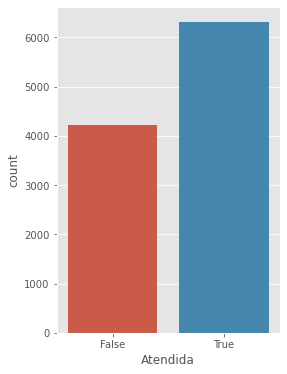

In [18]:
#Countplot
plt.figure(figsize= [4,6])
sns.countplot(x='Atendida', data=df_aed)

Nossa variável "target" está desbalanceada. Ajustaremos isso no notebook de Machine Learning, com aplicação de SMOTE.

# 5) Variável da Coluna "CodAssunto"
Uma variável explicativa de cardinalidade muito elevada

Valores únicos (175,)


D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

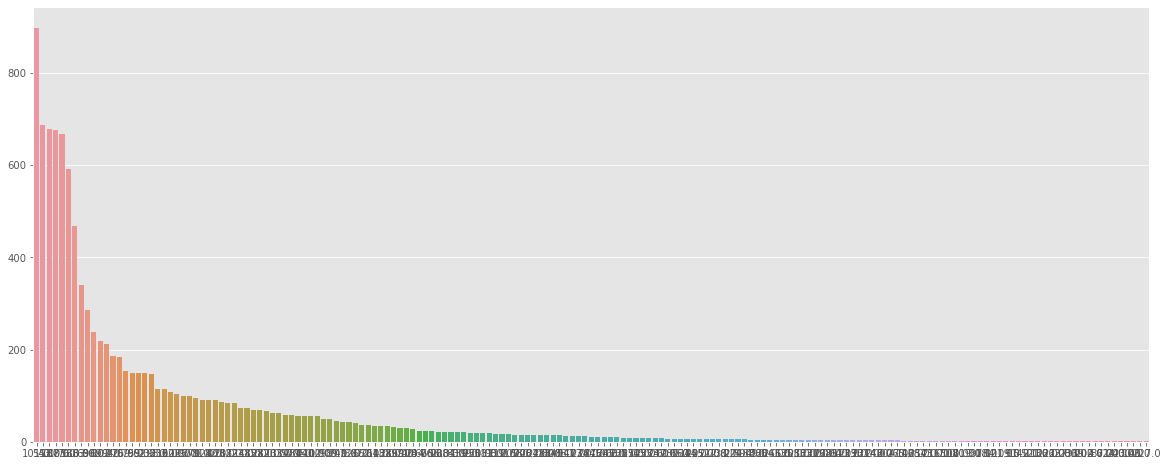

In [19]:
# Descrição dos valores da variável
print('Valores únicos',(df_aed['CodAssunto']).unique().shape)
# unique_ca = df_aed['CodAssunto'].unique()
# print(unique_ca) #optamos por não printar
cont_ca = df_aed['CodAssunto'].value_counts()
plt.figure(figsize= [20,8])
sns.barplot(cont_ca.index, cont_ca.values)

In [20]:
# Da mesma forma que a Coluna "CNAE", essa variável de elevada cardinalidade teve problemas. 
# Colocaremos em percentual e restringiremos aos dez maiores para melhorar a visualização

In [21]:
# Nas variáveis categóricas de alta cardinalidade, colocaremos em percentual e restringeremos aos dez maiores
pc_ca = (df_aed['CodAssunto'].value_counts(normalize = True) * 100).to_frame('Porcentagem').reset_index()
pc_ca.rename(columns = {'index': 'CodAssunto'}, inplace = True) 
pc_ca
pc_ca_dez = pc_ca[:10]

In [22]:
pc_ca_dez

,CodAssunto,Porcentagem
0,101.0,8.536933
1,54.0,6.521532
2,53.0,6.454986
3,187.0,6.416960
4,185.0,6.350414
5,76.0,5.618405
6,186.0,4.449092
7,183.0,3.222740
8,63.0,2.709383
9,96.0,2.262572


<AxesSubplot:xlabel='CodAssunto', ylabel='Porcentagem'>

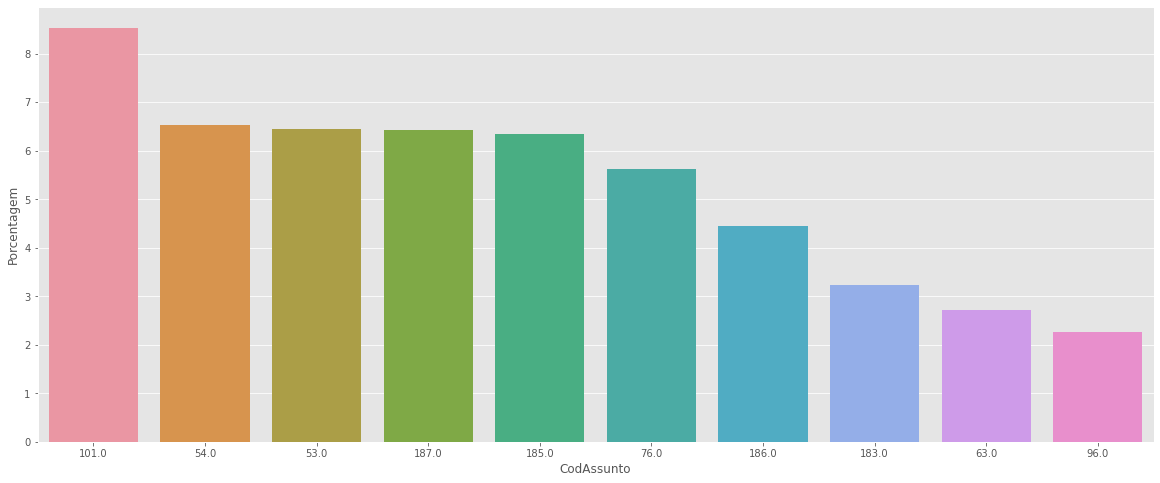

In [23]:
# Gráfico com as dez maiores ocorrências de CodAssunto
plt.figure(figsize= [20,8])
sns.barplot(x='CodAssunto',y='Porcentagem',data=pc_ca_dez)

Maiores ocorrências:
- 101 - Telefone ( Convencional) - 8.53%
- 54 - Cartão de Crédito - 6.52%
- 53 - Banco comercial - 6.45%
- 187 - Telefonia Celular - 6.41%
- 185 - Energia Elétrica - 6.35%
- 76 - "Outros Contratos" - 5.61%
- 186 - Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação ) - 4.44%
- 183 - Água / Esgoto - 3.22%
- 63 - Financeira 2.70%
- 96 - Televisão 2.26%


# 6) Variável da Coluna "SexoConsumidor"


In [24]:
# Descrição dos valores da variável
print('Valores únicos',(df_aed['SexoConsumidor']).unique().shape)
unique_sexo = df_aed['SexoConsumidor'].unique()
print(unique_sexo)
cont_sexo = df_aed['SexoConsumidor'].value_counts()
print(cont_sexo)

Valores únicos (2,)
['M' 'F']
F    5529
M    4990
Name: SexoConsumidor, dtype: int64


D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

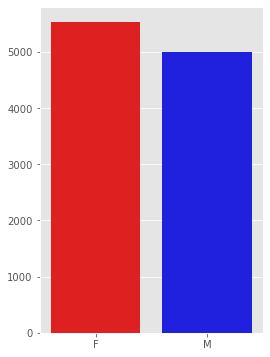

In [25]:
#Gráfico de Colunas SexoConsumidor
plt.figure(figsize= [4,6])
sns.barplot(cont_sexo.index, cont_sexo.values,palette=['r','b']) 


Um ligeiro número maior de reclamações do sexo feminino: 5529, ante 4990.

# 7) Variável da Coluna "FaixaEtaria"
Informamos que a variável já veio discretizada na base original, em  https://dados.gov.br/dataset/cadastro-nacional-de-reclamacoes-fundamentadas-procons-sindec1. Sendo assim, é uma variável categórica.

In [26]:
# Descrição dos valores da variável
print('Valores únicos',(df_aed['FaixaEtaria']).unique().shape)
unique_fa = df_aed['FaixaEtaria'].unique()
print(unique_fa)
cont_fa = df_aed['FaixaEtaria'].value_counts()
print(cont_fa)

Valores únicos (7,)
['5' '4' '3' '6' '7' '2' '1']
3    2461
4    2105
5    1816
6    1617
2    1601
7     723
1     196
Name: FaixaEtaria, dtype: int64


<AxesSubplot:xlabel='FaixaEtaria', ylabel='count'>

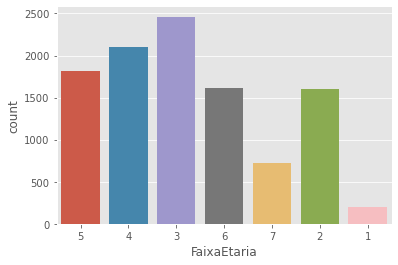

In [27]:
# Gráfico de Colunas 

sns.countplot(x='FaixaEtaria',data=df_aed)

- Faixa 1: até 20 anos
- Faixa 2: entre 21 a 30 anos
- Faixa 3: entre 31 a 40 anos
- Faixa 4: entre 41 a 50 anos
- Faixa 5: entre 51 a 60 anos
- Faixa 6: entre 61 a 70 anos
- Faixa 7: mais de 70 anos

<AxesSubplot:xlabel='FaixaEtaria', ylabel='count'>

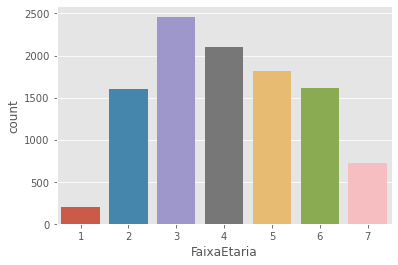

In [28]:
# Problemas de exibição, acima. Converteremos para inteiros para possibilitar a ordem
df_aed = df_aed.astype({'FaixaEtaria': int})
sns.countplot(x='FaixaEtaria',data=df_aed)

Nenhuma surpresa. Parece que o maior número de demandas ocorre nas faixas 3 (entre 31 a 40 anos) e 4 (entre 41 a 50).


In [29]:
# Resolvido o problema de exibição, retornaremos ao object
df_aed = df_aed.astype({'FaixaEtaria': object})

# 8) Variável da Coluna "CEP"
Elevadíssima cardinalidade. São 6354 valores diferentes. Mantivemos esta coluna apenas para representar a realidade. 
O CEP é um fator que pode influenciar na variável-target "Atendida"

In [30]:
 #8   CEP 
print('Valores únicos',(df_aed['CEP']).unique().shape)
# unique_CEP  = df_aed['CEP'].unique()
# print(unique_CEP) - optamos por não printar os 6354 valores
cont_CEP = df_aed['CEP'].value_counts()
print(cont_CEP)

Valores únicos (6354,)
75860000.0    351
78700000.0    173
27901000.0     84
75690000.0     75
79240000.0     68
             ... 
76808260.0      1
29220210.0      1
23560417.0      1
59140160.0      1
59125090.0      1
Name: CEP, Length: 6354, dtype: int64


CEPs com mais números. Não estranhamente em cidades que tem apenas o CEP final "000". A maior delas, Macaé-RJ, tem menos de 300.000 habitantes

- 75860000 351 Quirinópolis - GO
- 78700000 173 Rondonopolis - MT
- 27901000 84 Macaé - RJ
- 75690000 75 Caldas Novas - GO
- 79240000 68 Jardim - MS

In [31]:
# Devido às 6354 linhas a representar, os gráficos não retornavam informação alguma. Tentamos variações do de coluna.
# Gráfico de Colunas da base inteira #Leva muito tempo e gera pouca informação

In [32]:
# Nas variáveis categóricas de alta cardinalidade, colocaremos em percentual e restringeremos aos dez maiores
pc_cep = (df_aed['CEP'].value_counts(normalize = True) * 100).to_frame('Porcentagem').reset_index()
pc_cep.rename(columns = {'index': 'CEP'}, inplace = True) 
pc_cep
pc_cep_dez = pc_cep[:10]

In [33]:
pc_cep_dez

,CEP,Porcentagem
0,75860000.0,3.336819
1,78700000.0,1.644643
2,27901000.0,0.798555
3,75690000.0,0.712996
4,79240000.0,0.646449
5,14850000.0,0.636943
6,35600000.0,0.627436
7,78850000.0,0.627436
8,36500000.0,0.598916
9,88385000.0,0.598916


<AxesSubplot:xlabel='CEP', ylabel='Porcentagem'>

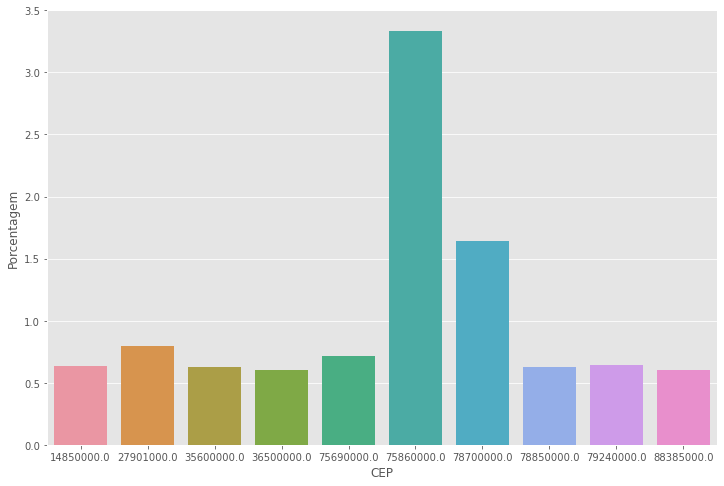

In [34]:
# Gráfico de colunas mostrando os CEPs com mais demandas
plt.figure(figsize= [12,8])
result = pc_cep_dez.groupby(['CEP'])['Porcentagem'].aggregate(np.sum).reset_index().sort_values('CEP') #para ordenar
sns.barplot(x='CEP',y='Porcentagem',data=pc_cep_dez,order=result['CEP']) # para ordenar

- 75860000 - Quirinópolis - GO - 3.33%
- 78700000 - Rondonopolis - MT - 1.64%
- 27901000 - Macaé - RJ - 0.79%
- 75690000 - Caldas Novas - GO - 0.71%
- 79240000 - Jardim - MS - 0.64%
- 14850000 - Pradópolis - SP - 0.63%
- 78850000 - Primavera do Leste - MT - 0.62%
- 35600000 - Bom Despacho - MG - 0.62%
- 36500000 - Ubá - MG -  0.59%
- 88385000 - Penha - SC - 0.59%

# 9) Variável da Coluna "InscritoDAU" (booleana)

In [35]:
# Descrição dos valores da variável
print('Valores únicos',(df_aed['InscritoDAU']).unique().shape)
unique_InscritoDAU = df_aed['InscritoDAU'].unique()
print(unique_InscritoDAU)
cont_InscritoDAU = df_aed['InscritoDAU'].value_counts()
print(cont_InscritoDAU)

Valores únicos (2,)
[ True False]
True     6365
False    4154
Name: InscritoDAU, dtype: int64


<AxesSubplot:xlabel='InscritoDAU', ylabel='count'>

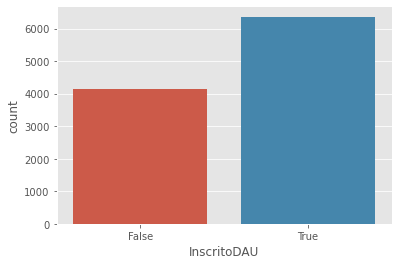

In [36]:
#Countplot
sns.countplot(x='InscritoDAU', data=df_aed)

# Preparação para utilizar a biblioteca de visualização Bokeh em gráficos de # análise bivariada

In [37]:
# Importação da biblioteca para geração dos gráficos 
from bokeh.layouts import row
from bokeh.io import output_notebook, show
from bokeh.layouts import row, column
from bokeh.models import ColumnDataSource, FactorRange, LabelSet, Range1d, Legend, LinearAxis, SingleIntervalTicker
from bokeh.plotting import figure
from bokeh.palettes import Spectral6, Category20
output_notebook()
import pandas_bokeh

Loading BokehJS ...

In [38]:
# Definição de parâmetros de Função que recebe um df e uma coluna categórica e retorna um gráfico com barras e linhas 

def grafico_relacao_atributo_target(df_aed, col, width=650, height=400, y_offset_qtde = 2, y_offset_perc_true = -18, y_offset_perc_false = -18, mlo=None):
    totais = [("qtd_total", "count"),
              ("qtd_atendida_True", lambda x: (x == True).sum()),
              ("qtd_atendida_False", lambda x: (x == False).sum())]
    dfy = df_aed.groupby(col).agg({"Atendida": totais}).reset_index()
    dfy.columns = [col, "qtd_total", "qtd_atendida_True", "qtd_atendida_False"]
    dfy["perc_atendida_True"] = round((dfy["qtd_atendida_True"] / dfy["qtd_total"]) * 100,2)
    dfy["perc_atendida_False"] = round((dfy["qtd_atendida_False"] / dfy["qtd_total"]) * 100,2)    
    if str(dfy[col].dtype) in ['bool','int64', 'float64']:
        dfy[col] = dfy[col].astype('str')
    maxValue = dfy["qtd_total"].max()
    if len(dfy) > 15:
        dfy = dfy.sort_values("qtd_total", ascending=False).head(True2)
        title = col + "(12 maiores classes)"
    else:
        title = col
    cds = ColumnDataSource(dfy)
    p = figure(x_range=dfy[col].tolist(), plot_height=height, plot_width=width, title = title, toolbar_location = None)
    Legend()
    p.add_layout(Legend(label_text_font_size='7pt'), 'right')
    p.vbar(x=col, top = "qtd_total", source=cds, width = 0.7)
    p.extra_y_ranges["perc"] = Range1d(start=0, end=109)
    p.yaxis.axis_label = "Quantidade de registros"
    p.y_range.end = int(maxValue * 1.07)
    p.add_layout(LinearAxis(y_range_name="perc", axis_label = "[%] em relação ao total de registros da classe",
                            axis_label_text_font_size = "8pt", ticker=SingleIntervalTicker(interval=10)), 'right')
    p.yaxis.formatter.use_scientific = False
    if mlo != None:
        p.xaxis.major_label_orientation = mlo
        p.xaxis.major_label_text_font_size = '7pt'
    p.line(x = col, y = "perc_atendida_True", source=cds, legend_label = "% Atendida = True", y_range_name = "perc", color = 'darkblue')
    p.circle(x = col, y = "perc_atendida_True", size=8, source=cds, legend_label = "% Atendida = True", y_range_name = "perc", color = "darkblue")
    p.line(x = col, y = "perc_atendida_False", source=cds, legend_label = "% Atendida = False", y_range_name = "perc", color = 'darkred')
    p.circle(x = col, y = "perc_atendida_False", size=8, source=cds, legend_label = "% Atendida = False", y_range_name = "perc", color = "darkred")
    labelsQtde = LabelSet(x = col, y = "qtd_total", text = "qtd_total", level = "glyph", x_offset = False , y_offset = y_offset_qtde,
                         source = cds, render_mode="canvas", text_align="center", text_font_size='9pt')
    labelsPercAtendTrue = LabelSet(x = col, y = "perc_atendida_True", y_range_name = "perc", text = "perc_atendida_True", level = "glyph", x_offset = False , y_offset = y_offset_perc_true,
                         source = cds,  render_mode="css", text_align="center", text_color = "darkblue", text_font_size='7pt')
    labelsPercAtendFalse = LabelSet(x = col, y = "perc_atendida_False", y_range_name = "perc", text = "perc_atendida_False", level = "glyph", x_offset = False , y_offset = y_offset_perc_false,
                         source = cds,  render_mode="css", text_align="center", text_color = "darkred", text_font_size='7pt')
    p.title.text_font_size = 'TrueFalsept'
    p.title.align='center'
    p.add_layout(labelsQtde)
    p.add_layout(labelsPercAtendTrue)
    p.add_layout(labelsPercAtendFalse)
    return p


# Parte II - Análise Bivariada, comparando cada uma das variáveis com a variável target.

# 1) Coluna "Região" X target "Atendida"

In [39]:
# Quantidade em que a Atendida é "True"
df_aed.groupby('Regiao').agg({'Atendida': ['sum']})

,Atendida
,sum
Regiao,
Centro-oeste,1447
Nordeste,661
Norte,640
Sudeste,3213
Sul,345


In [40]:
#Porcentagem em que a Atendida é "True"
x, y = 'Regiao','Atendida'
df_reg = df_aed.groupby(x)[y].value_counts(normalize = True)
df_reg = df_reg.mul(100)
df1 = df_reg.rename('Porcentagem').reset_index()
df1_filtrado =  df1[df1['Atendida']==True]
df1_filtrado

,Regiao,Atendida,Porcentagem
0,Centro-oeste,True,73.191705
2,Nordeste,True,57.328708
4,Norte,True,51.612903
6,Sudeste,True,57.099698
8,Sul,True,66.091954


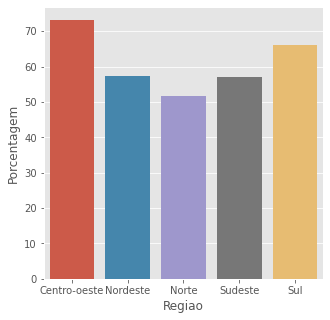

In [41]:
# Gráfico de colunas mostrando o maior número, em valores relativos, da Região Centro-Oeste
plt.subplots(figsize=(5,5))
sns.barplot(x= 'Regiao', y= 'Porcentagem',data=df1_filtrado)
plt.show()

In [42]:
# Gráfico Bokeh para análise bivariada, monstrado valores absolutos (colunas) e relativos (linhas)
g_reg  = grafico_relacao_atributo_target(df_aed, "Regiao")
show(g_reg)

# 2) Coluna "UF" X target "Atendida"

In [43]:
# Quantidade em que a Atendida é "True"
df_aed.groupby('UF').agg({'Atendida': ['sum']})

,Atendida
,sum
UF,
CE,40
ES,210
GO,954
MG,927
MS,4
MT,489
PA,16
PB,76


In [44]:
#Porcentagem em que a Atendida é "True"
x, y = 'UF','Atendida'
df_uf = df_aed.groupby(x)[y].value_counts(normalize = True)
df_uf = df_uf.mul(100)
df2 = df_uf.rename('Porcentagem').reset_index()
df2_filtrado =  df2[df2['Atendida']==True]
df2_filtrado

,UF,Atendida,Porcentagem
0,CE,True,57.971014
2,ES,True,61.764706
4,GO,True,71.353777
6,MG,True,85.359116
9,MS,True,5.063291
10,MT,True,87.165775
13,PA,True,50.000000
14,PB,True,84.444444
16,PR,True,57.894737
18,RJ,True,66.616766


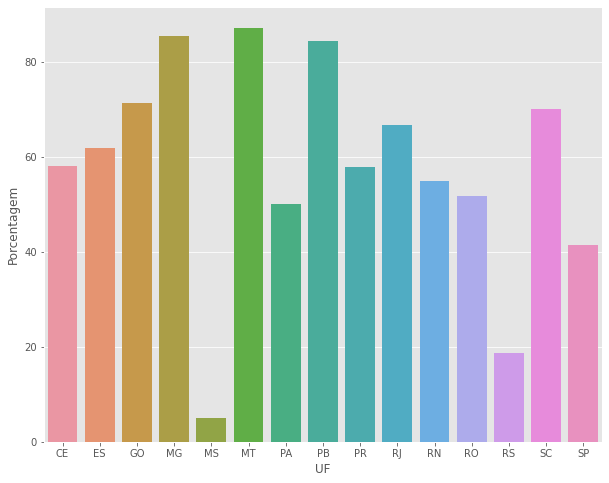

In [45]:
# Gráfico de colunas mostrando os valores relativos
plt.subplots(figsize=(10,8))
sns.barplot(x= df2_filtrado['UF'], y= df2_filtrado['Porcentagem'])
plt.show()

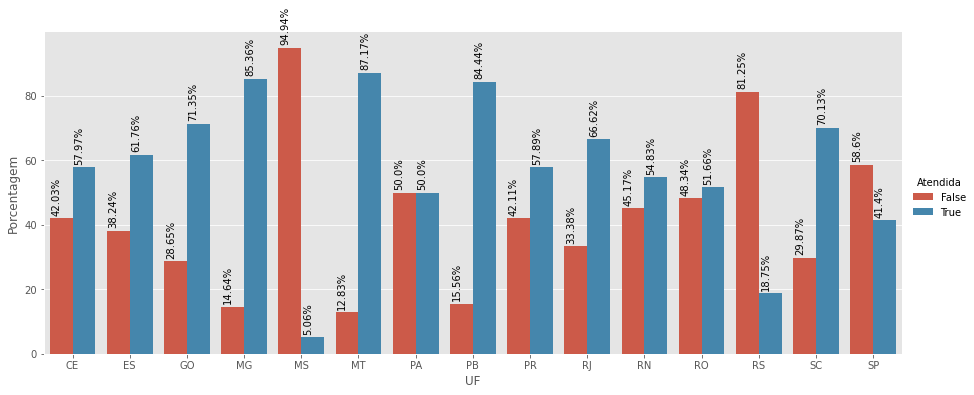

In [46]:
# Parece haver uma situação atípica com a UF Mato Grosso do Sul. Mais um gráfico para visulizarmos:
#x, y = 'UF','Atendida'
#df_uf = df_aed.groupby(x)[y].value_counts(normalize = True)
#df_uf = df_uf.mul(100)
# df_uf = df_uf.rename('Porcentagem').reset_index()
g = sns.catplot(x = x, y = 'Porcentagem', hue = y, kind = 'bar', data = df2, aspect = 2.5)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.03
    txt_y = p.get_height() + 1.5
    g.ax.text(txt_x, txt_y, txt, rotation = 90)

In [47]:
# Gráfico Bokeh para análise bivariada, monstrado valores absolutos (colunas) e relativos (linhas) 
g_uf = grafico_relacao_atributo_target(df_aed, "UF")
show(g_uf)

# 3) Coluna "CNAE" X target "Atendida"

In [48]:
# Da mesma forma que na análise univariada, a análise bivariada das categóricas com alta cardinalidade - CNAE, CodAssunto e
# CEP - ficou prejudicada. Adicionalmente ao que conseguimos demonstrar na análise univariada, aqui nem mesmo segmentar os 
# dez mais, por exemplo, ajudou: vários CNAE, CodAssunto e CEP com 100% de Atendida.

In [49]:
# Quantidades de vezes em que um CNAE corresponde a uma Atendida 'True'
df_aed.groupby('CNAE').agg({'Atendida': ['sum']})

,Atendida
,sum
CNAE,
1031700.0,1
1092900.0,1
1093701.0,2
1099699.0,1
1311100.0,1
...,...
9529199.0,3
9601701.0,0


In [50]:
#Porcentagem em que a Atendida é "True"
x, y = 'CNAE','Atendida'
df_cnae = df_aed.groupby(x)[y].value_counts(normalize = True)
df_cnae = df_cnae.mul(100)
df3 = df_cnae.rename('Porcentagem').reset_index()
df3_filtrado =  df3[df3['Atendida']==True]
df3_filtrado

,CNAE,Atendida,Porcentagem
0,1031700.0,True,100.000000
1,1092900.0,True,100.000000
2,1093701.0,True,66.666667
5,1099699.0,True,50.000000
7,1311100.0,True,50.000000
...,...,...,...
562,9521500.0,True,78.125000
564,9529103.0,True,100.000000
565,9529105.0,True,100.000000
566,9529199.0,True,75.000000


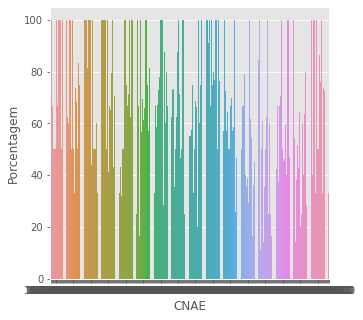

In [51]:
# Gráfico Prejudicado, assim, da mesma maneira que na análise univariada, selecionamos os maiores valores (células abaixo)
plt.subplots(figsize=(5,5))
sns.barplot(x= 'CNAE', y= 'Porcentagem',data=df3_filtrado)
plt.show()

In [52]:
# Selecionando os maiores valores da variável de elevada cardinalidade X "Atendida"

In [53]:
pc_biv_cnae= df3_filtrado.sort_values(by='Porcentagem', ascending=False)

In [54]:
pc_biv_cnae

,CNAE,Atendida,Porcentagem
0,1031700.0,True,100.000000
484,8299707.0,True,100.000000
160,4618403.0,True,100.000000
159,4618402.0,True,100.000000
157,4541205.0,True,100.000000
...,...,...,...
173,4643501.0,True,16.666667
432,6821802.0,True,14.285714
128,4321500.0,True,14.285714
498,8520100.0,True,14.285714


In [55]:
pc_biv_cnae_dez = pc_biv_cnae[:10]

In [56]:
pc_biv_cnae_dez

,CNAE,Atendida,Porcentagem
0,1031700.0,True,100.0
484,8299707.0,True,100.0
160,4618403.0,True,100.0
159,4618402.0,True,100.0
157,4541205.0,True,100.0
156,4541204.0,True,100.0
320,5620102.0,True,100.0
152,4530704.0,True,100.0
323,5812300.0,True,100.0
145,4520007.0,True,100.0


In [57]:
# Mesmo segmentado para apenas os que tiveram 100% Atendidas, o gráfico continuaria sem fornecer respostas: várias linhas
# com valor máximo

# 4) Coluna "CodAssunto" X target "Atendida"

In [58]:
# Da mesma forma que na análise univariada, a análise bivariada das categóricas com alta cardinalidade - CNAE, CodAssunto e
# CEP - ficou prejudicada. Adicionalmente ao que conseguimos demonstrar na análise univariada, aqui nem mesmo segmentar os 
# dez mais, por exemplo, ajudou: vários CNAE, CodAssunto e CEP com 100% de Atendida.

In [59]:
# Quantidades de vezes em que um CNAE corresponde a uma Atendida 'True'
df_aed.groupby('CodAssunto').agg({'Atendida': ['sum']})

,Atendida
,sum
CodAssunto,
10.0,1
100.0,28
101.0,678
102.0,136
103.0,65
...,...
95.0,41
96.0,157


In [60]:
#Porcentagem em que a Atendida é "True"
x, y = 'CodAssunto','Atendida'
df_ca = df_aed.groupby(x)[y].value_counts(normalize = True)
df_ca = df_ca.mul(100)
df4 = df_ca.rename('Porcentagem').reset_index()
df4_filtrado =  df4[df4['Atendida']==True]
df4_filtrado

,CodAssunto,Atendida,Porcentagem
0,10.0,True,100.000000
1,100.0,True,50.909091
3,101.0,True,75.501114
5,102.0,True,64.454976
7,103.0,True,75.581395
...,...,...,...
298,95.0,True,71.929825
300,96.0,True,65.966387
302,97.0,True,68.686869
304,98.0,True,70.588235


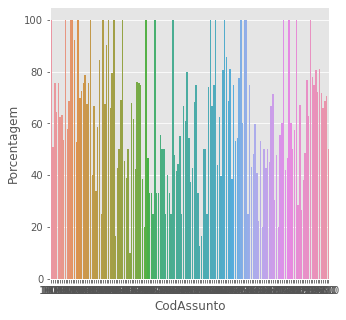

In [61]:
# Gráfico Prejudicado, assim, da mesma maneira que na análise univariada, selecionamos os maiores valores (células abaixo)
plt.subplots(figsize=(5,5))
sns.barplot(x= 'CodAssunto', y= 'Porcentagem',data=df4_filtrado)
plt.show()


In [62]:
# Selecionando os maiores valores da variável de elevada cardinalidade X "Atendida"

In [63]:
pc_biv_ca= df4_filtrado.sort_values(by='Porcentagem', ascending=False)
pc_biv_ca_dez = pc_biv_ca[:10]
pc_biv_ca_dez

,CodAssunto,Atendida,Porcentagem
0,10.0,True,100.0
42,128.0,True,100.0
61,14.0,True,100.0
67,143.0,True,100.0
76,15.0,True,100.0
287,9.0,True,100.0
102,202.0,True,100.0
270,8.0,True,100.0
111,21.0,True,100.0
263,75.0,True,100.0


In [64]:
# Mesmo segmentado para apenas os que tiveram 100% Atendidas, o gráfico continuaria sem fornecer respostas: várias linhas
# com valor máximo

# 5) Coluna "SexoConsumidor" X target "Atendida"

In [65]:
# Quantidade em que a Atendida é "True"
df_aed.groupby('SexoConsumidor').agg({'Atendida': ['sum']})

,Atendida
,sum
SexoConsumidor,
F,3302
M,3004


In [66]:
#Porcentagem em que a Atendida é "True"
x, y = 'SexoConsumidor','Atendida'
df_sc = df_aed.groupby(x)[y].value_counts(normalize = True)
df_sc = df_sc.mul(100)
df5 = df_sc.rename('Porcentagem').reset_index()
df5_filtrado =  df5[df5['Atendida']==True]
df5_filtrado

,SexoConsumidor,Atendida,Porcentagem
0,F,True,59.721469
2,M,True,60.200401


Rectangle(xy=(-0.4, 0), width=0.8, height=59.7215, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=60.2004, angle=0)


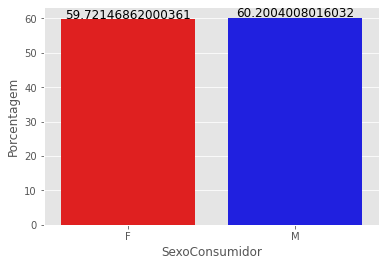

In [67]:
#Acrescentaremos números a este barplot as colunas pq ficaram muito parecidas.
plot = sns.barplot(data=df5_filtrado,x='SexoConsumidor',y='Porcentagem',palette=['r','b'],ci=False)
for i in plot.patches:
    print(i)
for i in plot.patches:
     plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')

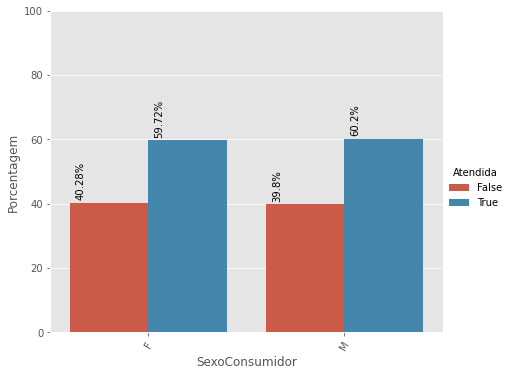

In [68]:
#Gráfico lado a lado para melhor visualização do problema acima
x, y = 'SexoConsumidor','Atendida'
df = df_aed.groupby(x)[y].value_counts(normalize = True)
df = df.mul(100)
df = df.rename('Porcentagem').reset_index()

g = sns.catplot(x = x, y = 'Porcentagem', hue = y, kind = 'bar', data = df5, aspect = 1.2)
g.set_xticklabels(rotation = 60)
g.ax.set_ylim(0, 100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.03
    txt_y = p.get_height() + 1.5
    g.ax.text(txt_x, txt_y, txt, rotation = 90)


In [69]:
# Gráfico Bokeh para análise bivariada, monstrado valores absolutos (colunas) e relativos (linhas)
g_sc  = grafico_relacao_atributo_target(df_aed, "SexoConsumidor")
show(g_sc)

# 6) Coluna "FaixaEtaria" X target "Atendida"

In [70]:
# Quantidade em que a Atendida é "True"
df_aed.groupby('FaixaEtaria').agg({'Atendida': ['sum']})

,Atendida
,sum
FaixaEtaria,
1,139
2,956
3,1465
4,1251
5,1061
6,1025
7,409


In [71]:
#Porcentagem em que a Atendida é "True"
x, y = 'FaixaEtaria','Atendida'
df_fa = df_aed.groupby(x)[y].value_counts(normalize = True)
df_fa = df_fa.mul(100)
df6 = df_fa.rename('Porcentagem').reset_index()
df6_filtrado =  df6[df6['Atendida']==True]
df6_filtrado

,FaixaEtaria,Atendida,Porcentagem
0,1,True,70.918367
2,2,True,59.712680
4,3,True,59.528647
6,4,True,59.429929
8,5,True,58.425110
10,6,True,63.388992
12,7,True,56.569848


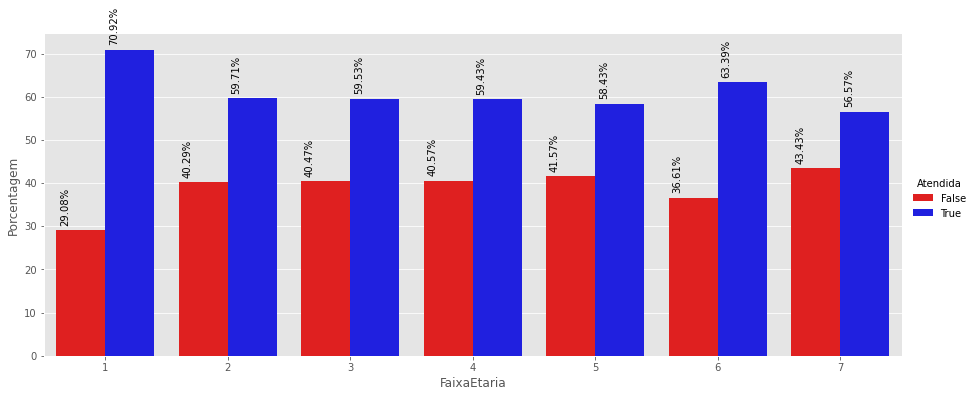

In [72]:
# Gráfico do percentual de demandas 'Atendida' True e False por faixa etária
x, y = 'FaixaEtaria','Atendida'
df_fa = df_aed.groupby(x)[y].value_counts(normalize = True)
df_fa = df_fa.mul(100)
df_fa = df_fa.rename('Porcentagem').reset_index()
g = sns.catplot(x = x, y = 'Porcentagem', hue = y, kind = 'bar', data = df_fa, palette=['r','b'],aspect = 2.5)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.03
    txt_y = p.get_height() + 1.5
    g.ax.text(txt_x, txt_y, txt, rotation = 90)

Uma constatação para o gráfico acima, é que, embora as demandas do público mais jovem tenham mais percentual de atendimento com sucesso, elas representam pouco no cômputo geral, pois:

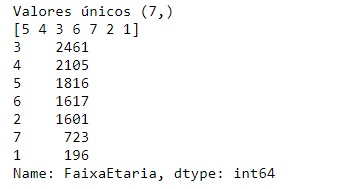


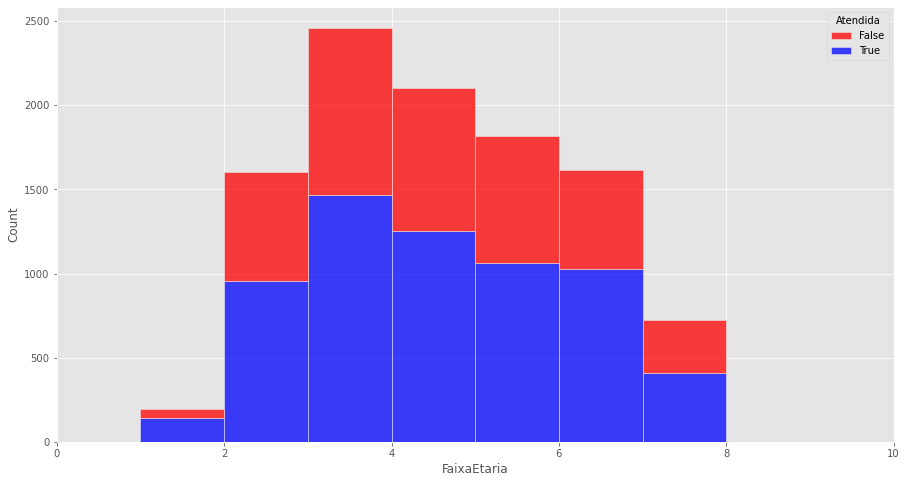

In [73]:
# Mais um gráfico mostrando como a quantidade dessa faixa etária dos mais novos é pequena:
f, ax = plt.subplots(figsize = (15, 8))
sns.histplot(
    df_aed[['FaixaEtaria', 'Atendida']],
    x = 'FaixaEtaria', 
    hue = 'Atendida',
    multiple = 'stack',
    bins = 10,
    binrange = (0, 10),
    palette=['r','b']
)
ax.set_xlim(0, 10)
plt.show()

In [74]:
# Gráfico Bokeh para análise bivariada, monstrado valores absolutos (colunas) e relativos (linhas)
g_fe  = grafico_relacao_atributo_target(df_aed, "FaixaEtaria")
show(g_fe)

# 7) Coluna "CEP" X target "Atendida"

In [75]:
# Da mesma forma que na análise univariada, a análise bivariada das categóricas com alta cardinalidade - CNAE, CodAssunto e
# CEP - ficou prejudicada. Adicionalmente ao que conseguimos demonstrar na análise univariada, aqui nem mesmo segmentar os 
# dez mais, por exemplo, ajudou: vários CNAE, CodAssunto e CEP com 100% de Atendida.

In [76]:
# Quantidades em que a Atendida é 'True'
df_aed.groupby('CEP').agg({'Atendida': ['sum']})

,Atendida
,sum
CEP,
1005010.0,0
1017000.0,0
1020000.0,0
1020010.0,0
1020904.0,0
...,...
9942098.0,0
9950300.0,0


Repetindo o que discorremos na análise univariada, a variável CEP é de uma cardinalidade que beira a inutilidade. 
Mantemos, apenas, porque pode ser fator que influencie decisivamente na variável target

In [77]:
#Porcentagem em que a Atendida é "True"
x, y = 'CEP','Atendida'
df_cep = df_aed.groupby(x)[y].value_counts(normalize = True)
df_cep = df_cep.mul(100)
df7 = df_cep.rename('Porcentagem').reset_index()
df7_filtrado =  df7[df7['Atendida']==True]
df7_filtrado

,CEP,Atendida,Porcentagem
6,1032010.0,True,100.0
10,1102000.0,True,100.0
12,11025020.0,True,100.0
19,11065050.0,True,100.0
21,11065651.0,True,100.0
...,...,...,...
6723,9861040.0,True,100.0
6727,9910650.0,True,100.0
6728,9920110.0,True,100.0
6730,9940460.0,True,100.0


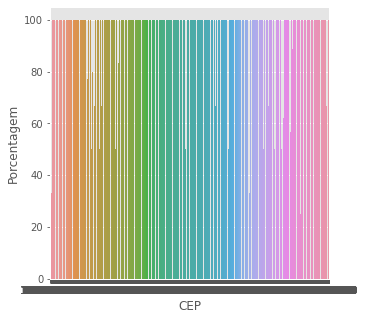

In [78]:
# Gráfico Prejudicado, assim, da mesma maneira que na análise univariada, selecionamos os maiores valores (células abaixo)
plt.subplots(figsize=(5,5))
sns.barplot(x= 'CEP', y= 'Porcentagem',data=df7_filtrado)
plt.show()

In [79]:
#Tentativa com o Bokeh de melhorar o gráfico
df7_filtrado.plot_bokeh(kind='bar', x='CEP', y='Porcentagem',category='Atendida')

Figure(id='1887', ...)

In [80]:
# Selecionando os maiores valores da variável de elevada cardinalidade X "Atendida"

pc_biv_cep= df7_filtrado.sort_values(by='Porcentagem', ascending=False)
pc_biv_cep_dez = pc_biv_cep[:10]
pc_biv_cep_dez

,CEP,Atendida,Porcentagem
6,1032010.0,True,100.0
4413,63180970.0,True,100.0
4471,6775300.0,True,100.0
4473,6785070.0,True,100.0
4475,6787370.0,True,100.0
4476,6790100.0,True,100.0
4477,67961.0,True,100.0
4479,6810480.0,True,100.0
4480,68140000.0,True,100.0
4481,6815620.0,True,100.0


In [81]:
# Mesmo segmentado para apenas os que tiveram 100% Atendidas, o gráfico continuaria sem fornecer respostas: várias linhas
# com valor máximo

# 8) Coluna "InscritoDAU" X target "Atendida"

In [82]:
#AtendidaXInscritoDAU

In [83]:
# Quantidade em que a Atendida é "True"

df_aed.groupby('Atendida').agg({'InscritoDAU': ['sum']})

,InscritoDAU
,sum
Atendida,
False,2689
True,3676


In [84]:
#Porcentagem em que a Atendida é "True"
x, y = 'InscritoDAU','Atendida'
df_dau = df_aed.groupby(x)[y].value_counts(normalize = True)
df_dau = df_dau.mul(100)
df8 = df_dau.rename('Porcentagem').reset_index()
df8_filtrado =  df8[df8['Atendida']==True]
df8_filtrado

,InscritoDAU,Atendida,Porcentagem
0,False,True,63.312470
2,True,True,57.753339


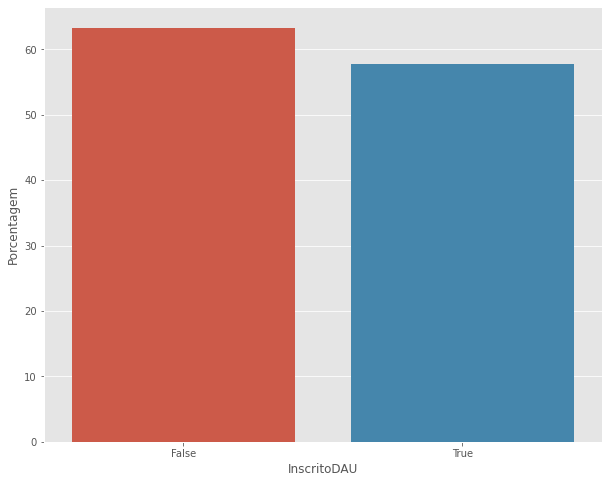

In [85]:
#Barplot mostrando que as demandas pertencentes a empresas que tem DAU (InscritoDAU=True) são
# as que tem porcentagem de demandas Atendidas menor
plt.subplots(figsize=(10,8))
sns.barplot(x= df8_filtrado['InscritoDAU'], y= df8_filtrado['Porcentagem'])
plt.show()

In [86]:
# Gráfico Bokeh para análise bivariada, monstrado valores absolutos (colunas) e relativos (linhas)
g_dau  = grafico_relacao_atributo_target(df_aed, "InscritoDAU")
show(g_dau)

# Sweetviz

Não obstante o trabalho manual discorrido até aqui, existe a biblioteca open-source Sweetviz que automatiza o que foi demonstrado acima. Temos variáveis categóricas. O Sweetviz demonstra o coeficiente de incerteza entre as variáveis categóricas.

In [87]:
import sweetviz as sv

In [88]:
report = sv.analyze(df_aed, 'Atendida')



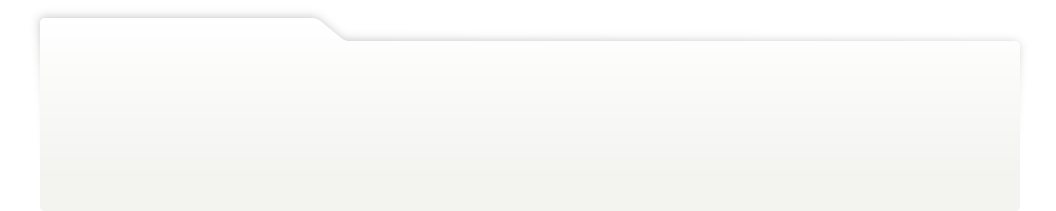
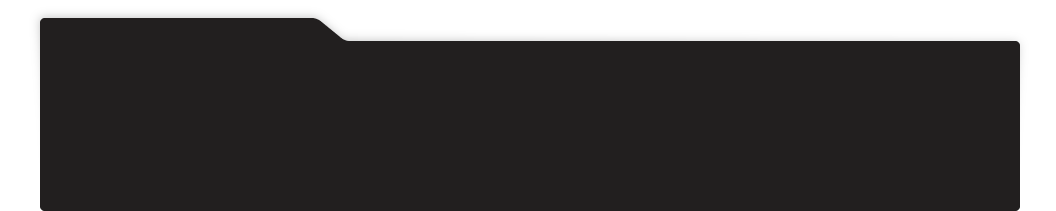
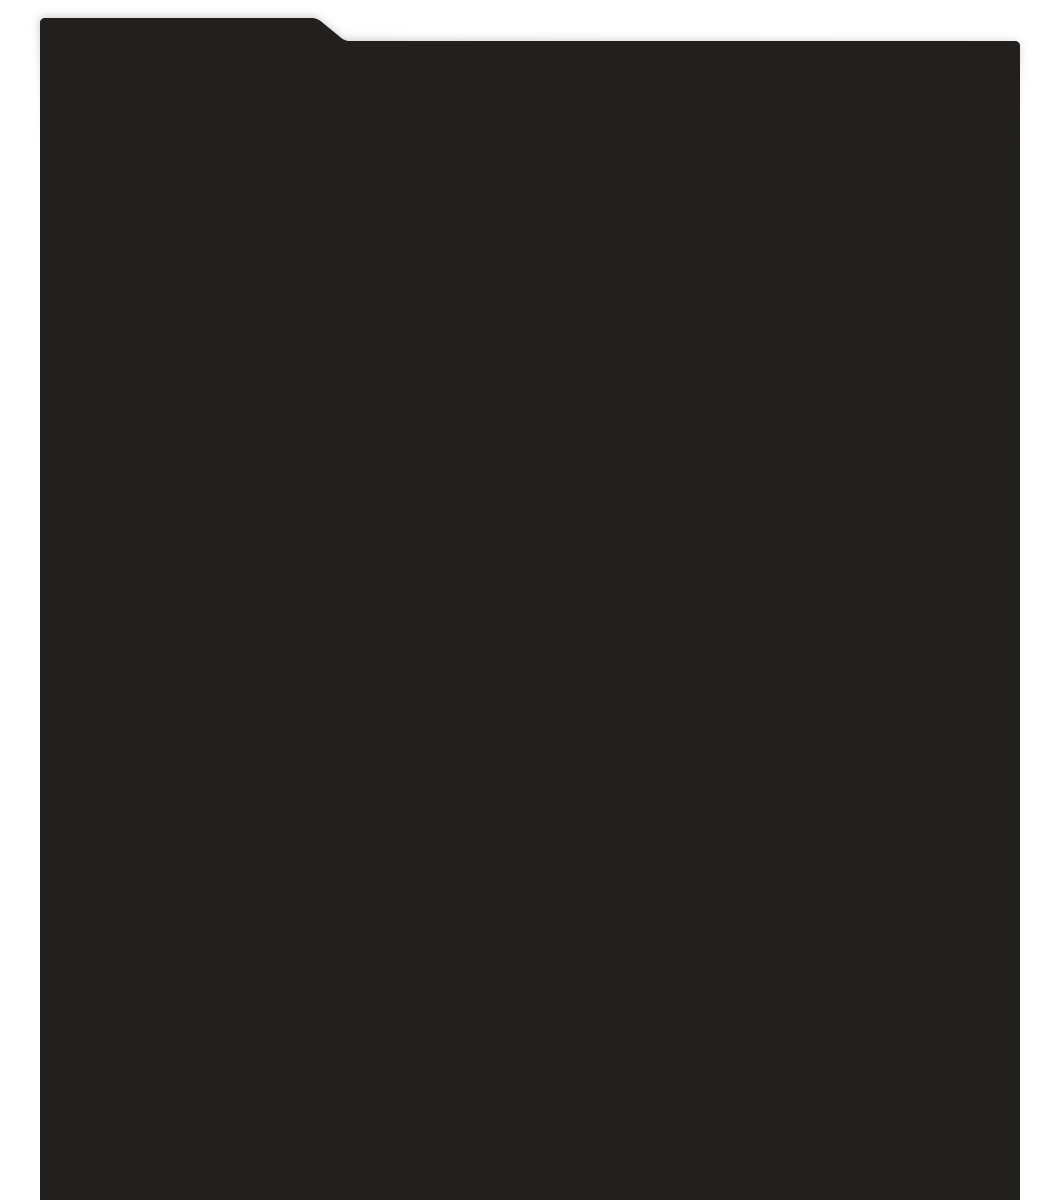
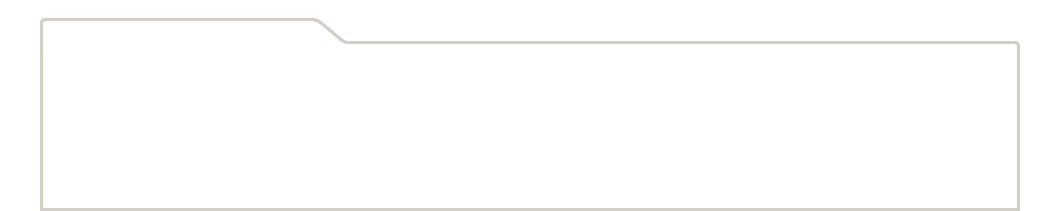
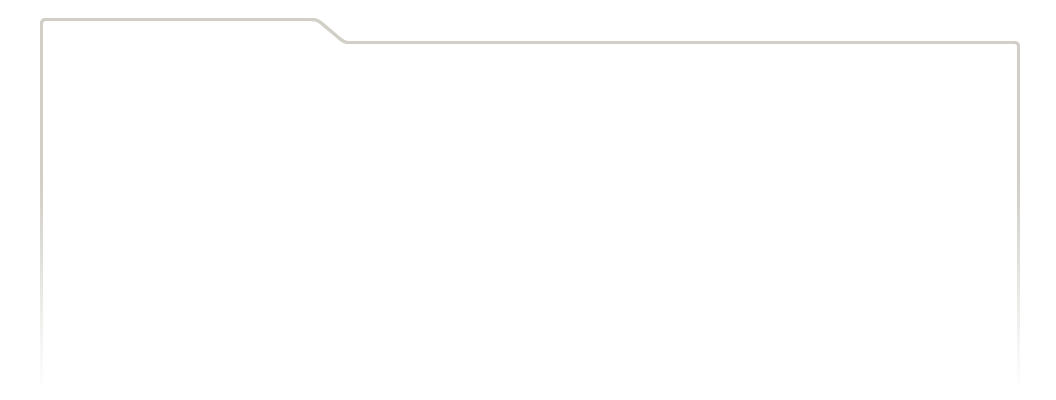
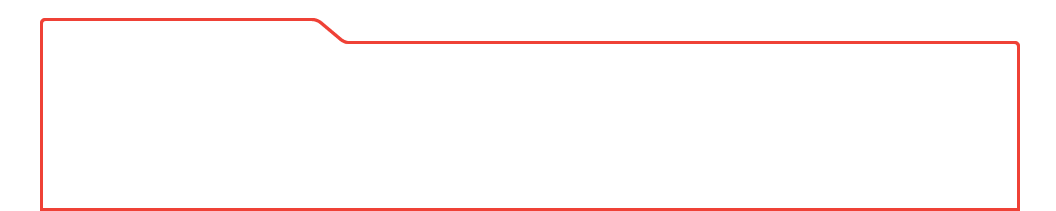
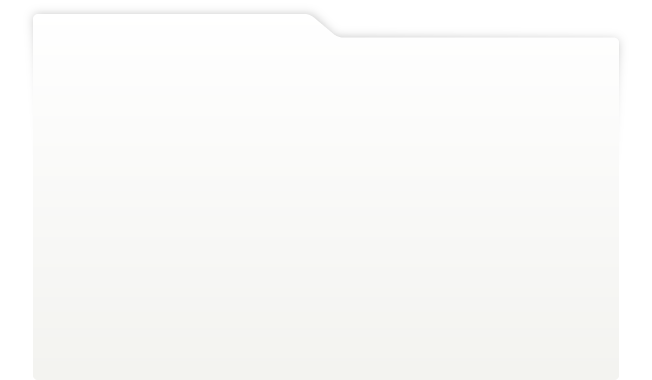
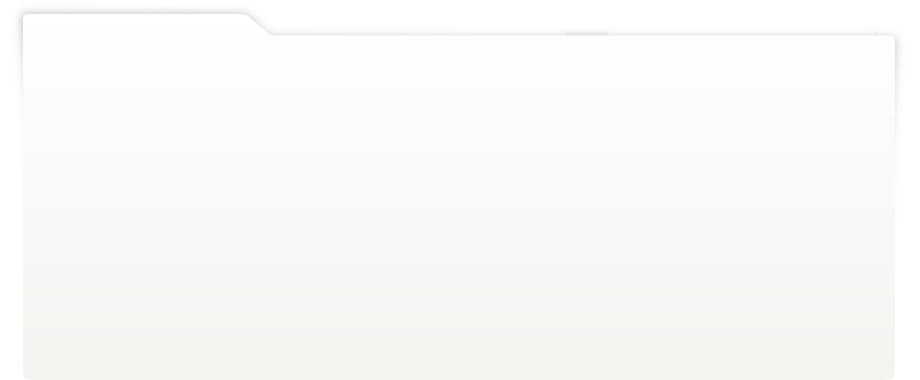
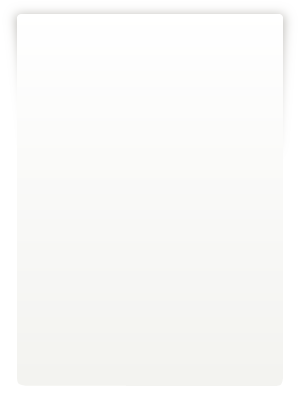
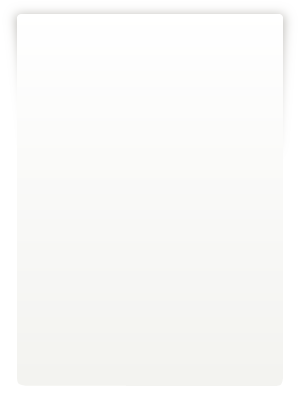
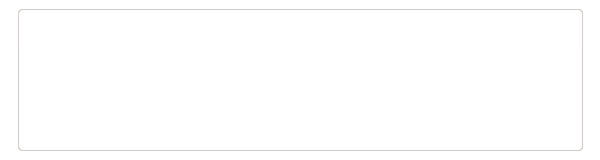
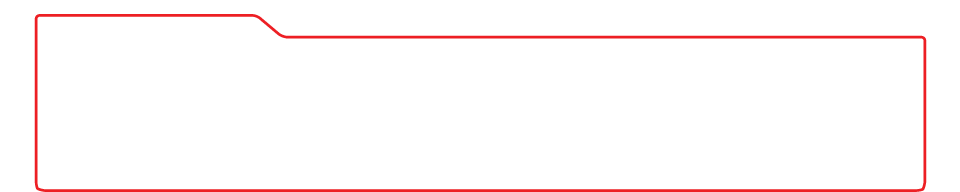
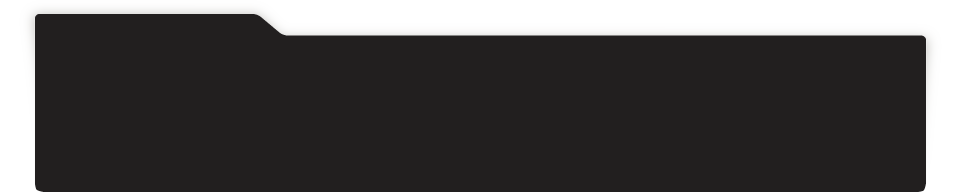
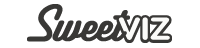
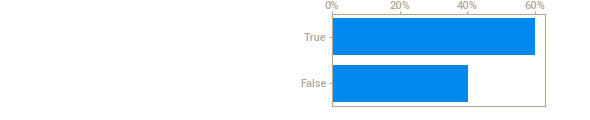
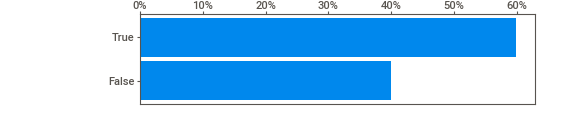
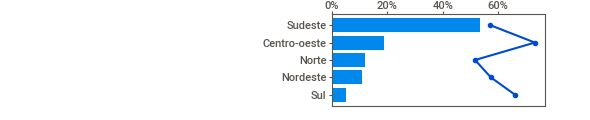
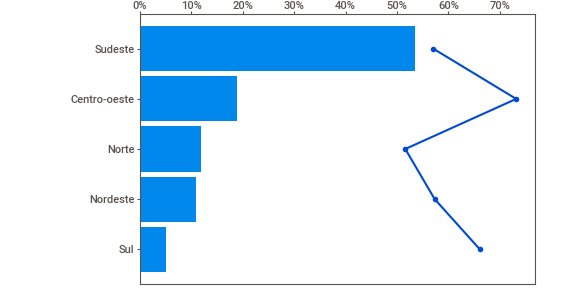
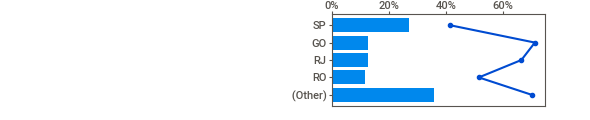
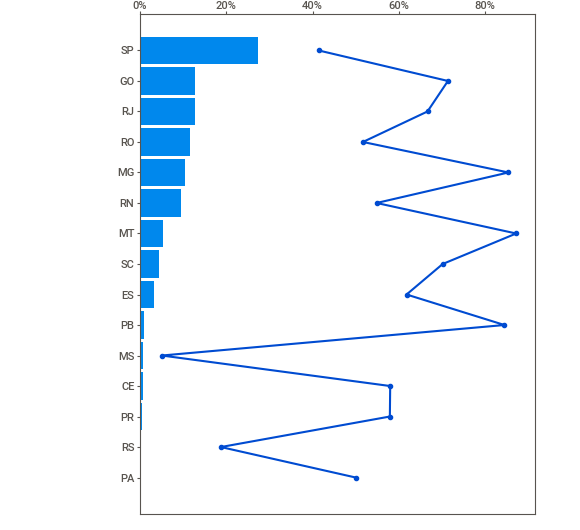
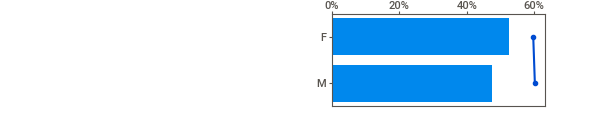
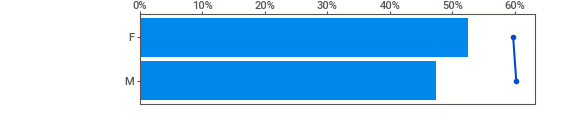
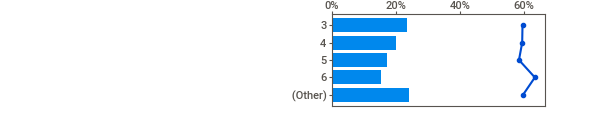
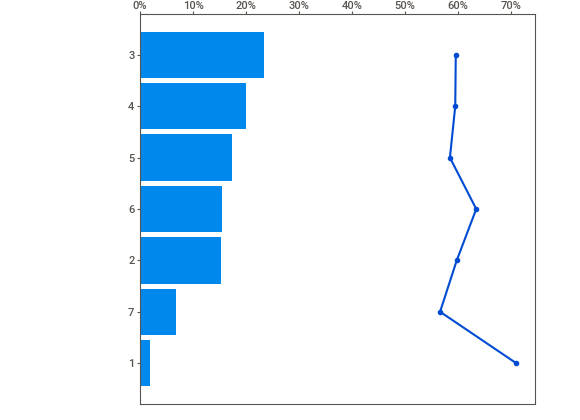
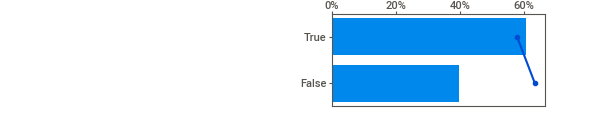
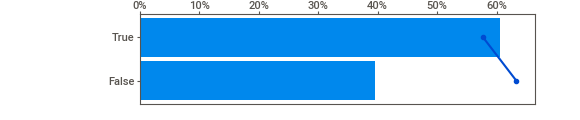
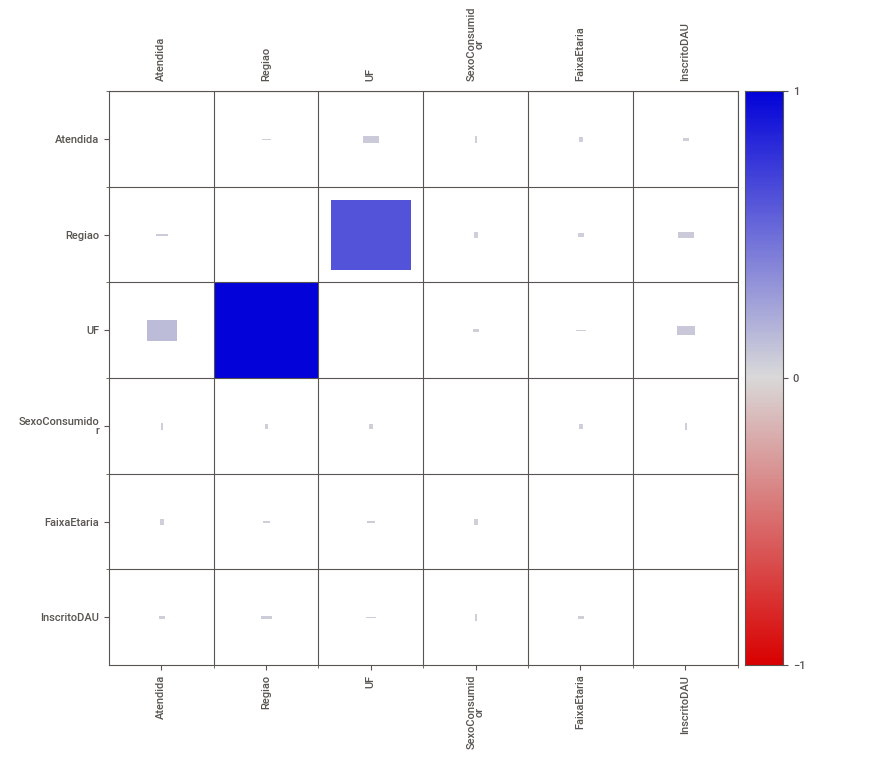
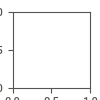

In [89]:
# Clicando no botão "Associations" é possível verificar as associações. 
# A primeira coluna da tabela que aparece qnd se clica no botão "Associations"  é da variável target, "Atendida"
report.show_notebook(layout = 'vertical')

# Apêndice de AED

# Pairplot


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


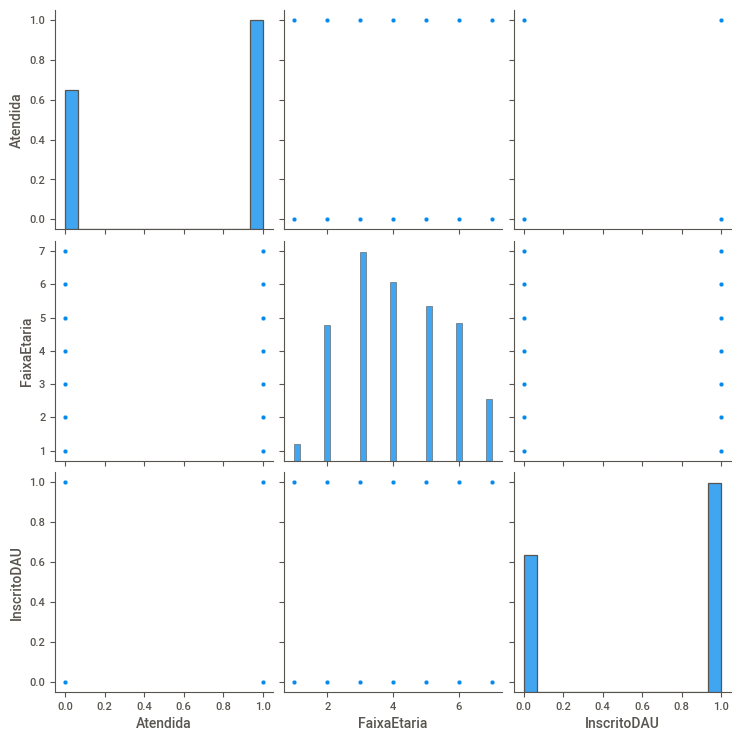

In [90]:
sns.pairplot(df_aed)